## Packages

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

## Read wav file

In [2]:
wav_file = 'data/test.wav'
samplerate, data = wavfile.read(wav_file)

In [3]:
try:
    x = data[:,0]
except IndexError as e:
    x = data

x.shape

(55716,)

### Wav file as np.ndarray

In [4]:
n = x.shape[0]
duration = n / samplerate
t = np.linspace(0.0, duration, n)
dt = t[1] - t[0]

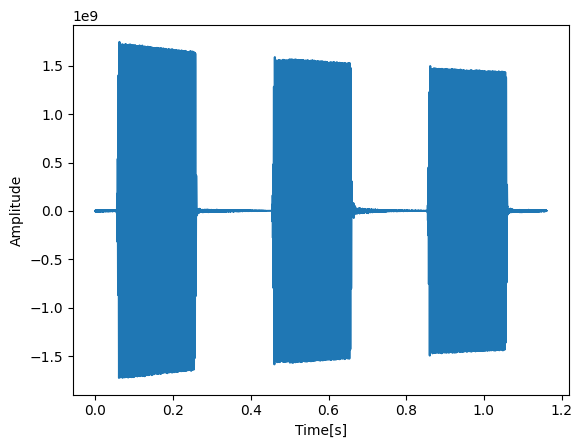

In [5]:
plt.plot(t[:], x[:], label='sound')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.show()

### Fourier Transform of wav file

In [6]:
x_hat = np.fft.fft(x)
freq_x = np.fft.fftfreq(n, d = dt)
x_hat_abs = np.abs(x_hat) ** 2 / n

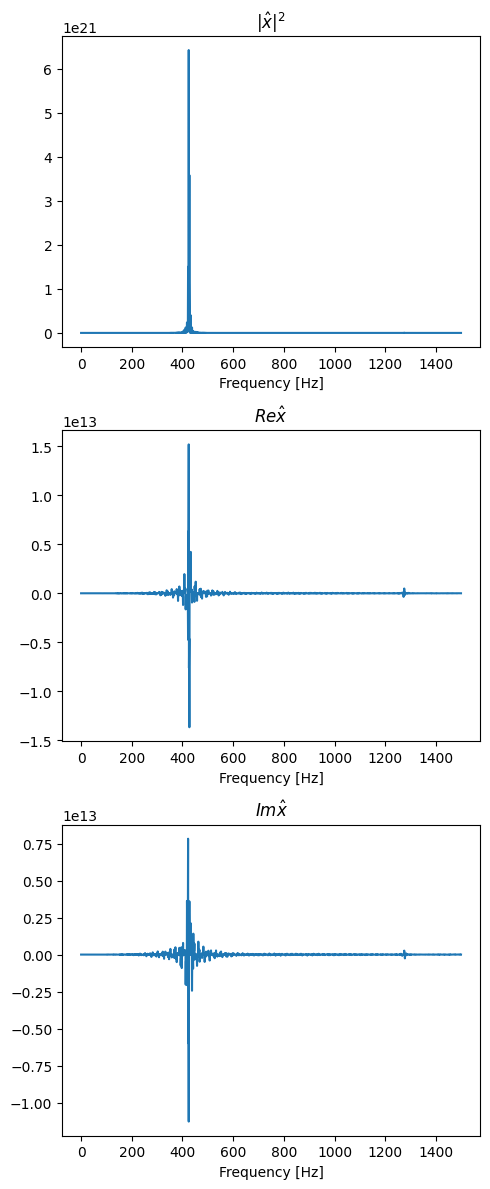

In [7]:
k = 1 << 5

fig, ax = plt.subplots(3,1, figsize=(5,12))

ax[0].plot(freq_x[:n//k], x_hat_abs[:n//k] )
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title(r"$\left|\hat{x}\right|^2$")

ax[1].plot(freq_x[:n//k], x_hat.real[:n//k] )
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_title(r"$Re \hat{x}$")

ax[2].plot(freq_x[:n//k], x_hat.imag[:n//k] )
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_title(r"$Im \hat{x}$")

fig.tight_layout()
plt.show()

## Create a new wav file

In [8]:
tt = np.arange(start=0.0, stop=1.0, step=1/samplerate)

In [9]:
w = 2*np.pi*330
y = np.sin(w*tt**2)

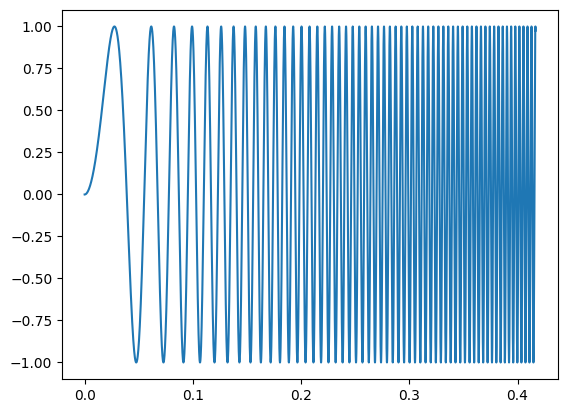

In [10]:
l = 20000
plt.plot(tt[:l], y[:l])
plt.show()

In [11]:
wavfile.write(filename='sound.wav', rate=samplerate, data = y)

In [12]:
y_hat = np.fft.fft(y)
freq_y = np.fft.fftfreq(len(tt), d = tt[1] - tt[0])
y_hat_abs = np.abs(y_hat) ** 2 / len(tt)

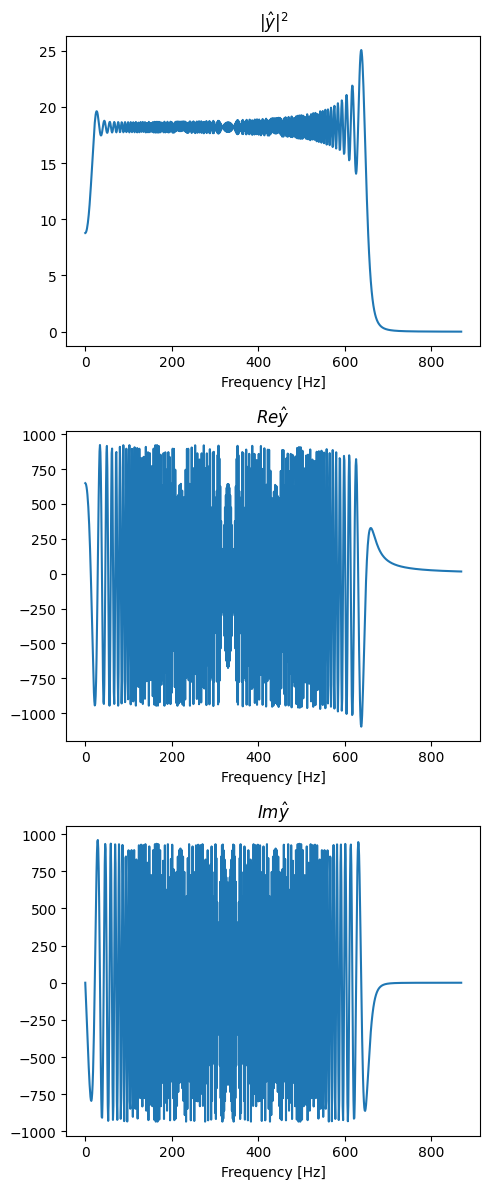

In [13]:
k = 1<<6

fig, ax = plt.subplots(3,1, figsize=(5,12))

ax[0].plot(freq_y[:n//k], y_hat_abs[:n//k] )
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title(r"$\left|\hat{y}\right|^2$")

ax[1].plot(freq_y[:n//k], y_hat.real[:n//k] )
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_title(r"$Re \hat{y}$")

ax[2].plot(freq_y[:n//k], y_hat.imag[:n//k] )
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_title(r"$Im \hat{y}$")

fig.tight_layout()
plt.show()

## Spectogram

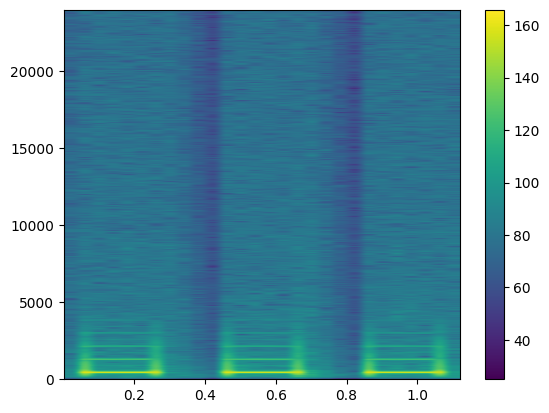

In [14]:
plt.specgram(x, Fs = samplerate, NFFT = 2048)
plt.colorbar()
plt.show()

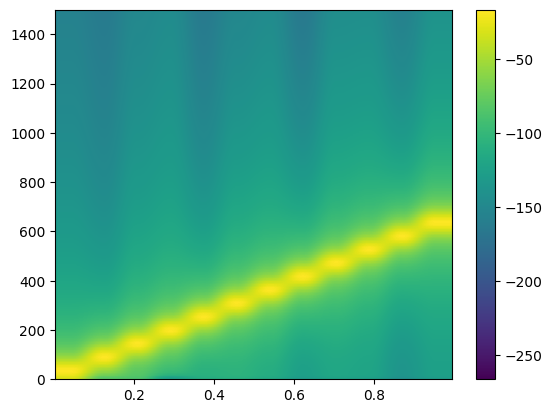

In [15]:
plt.specgram(y, Fs = samplerate, NFFT = 4096)
plt.ylim(0, 1500)
plt.colorbar()
plt.show()

## Satie

In [16]:
sr, musica = wavfile.read('data/satie.wav')

In [17]:
sr, musica.shape

(44100, (8097088, 2))

In [18]:
duracao = musica.shape[0] / sr
duracao

183.60743764172335

In [19]:
time = np.arange(start = 0, stop = duracao, step = 1/sr)
time.shape

(8097088,)

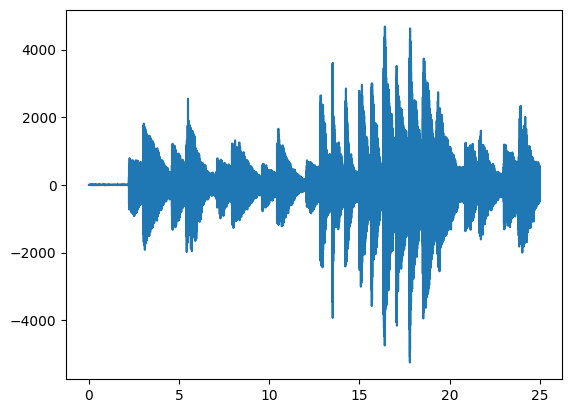

In [20]:
sec = 25
satie = musica[:sec*sr,0]
plt.plot(time[:sec*sr], satie)
plt.show()

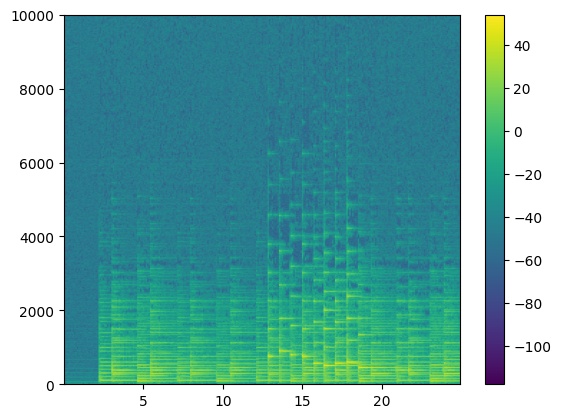

In [21]:
plt.specgram(satie, NFFT = 4096, Fs = sr)
plt.colorbar()
plt.ylim(0, 10000)
plt.show()